In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pyabf

In [2]:
%matplotlib inline
%run "./functions collections.py"

In [3]:
fp = 'D:/Lab data at Harvard/Clampex Data/20180727 Mouse-0/'
fl = os.listdir(fp)
data_names = [fp + x for x in fl]
data_names

['D:/Lab data at Harvard/Clampex Data/20180727 Mouse-0/s1003.abf',
 'D:/Lab data at Harvard/Clampex Data/20180727 Mouse-0/s1004.abf',
 'D:/Lab data at Harvard/Clampex Data/20180727 Mouse-0/s2003.abf',
 'D:/Lab data at Harvard/Clampex Data/20180727 Mouse-0/s2004.abf',
 'D:/Lab data at Harvard/Clampex Data/20180727 Mouse-0/wg1000.abf',
 'D:/Lab data at Harvard/Clampex Data/20180727 Mouse-0/wg1001.abf',
 'D:/Lab data at Harvard/Clampex Data/20180727 Mouse-0/wg2000.abf',
 'D:/Lab data at Harvard/Clampex Data/20180727 Mouse-0/wg2001.abf']

# Mouse-0 Day-5

In [4]:
fs = 20000

In [5]:
wg1 = pyabf.ABF(data_names[5])
wg2 = pyabf.ABF(data_names[7])

In [6]:
wg1.setSweep(0)
wg2.setSweep(0)

wg1_data = np.reshape(wg1.signalData, (int(wg1.signalData.shape[0]/8), 8));
wg2_data = np.reshape(wg2.signalData, (int(wg2.signalData.shape[0]/8), 8));
factor1 = np.array([10., 10., 100., 10., 10., 10., 10., 10.]);
factor2 = np.array([10., 10., 10., 10., 10., 10., 10., 10.]);

wg1_data = wg1_data * factor1[None, :]
wg2_data = wg2_data * factor2[None, :]

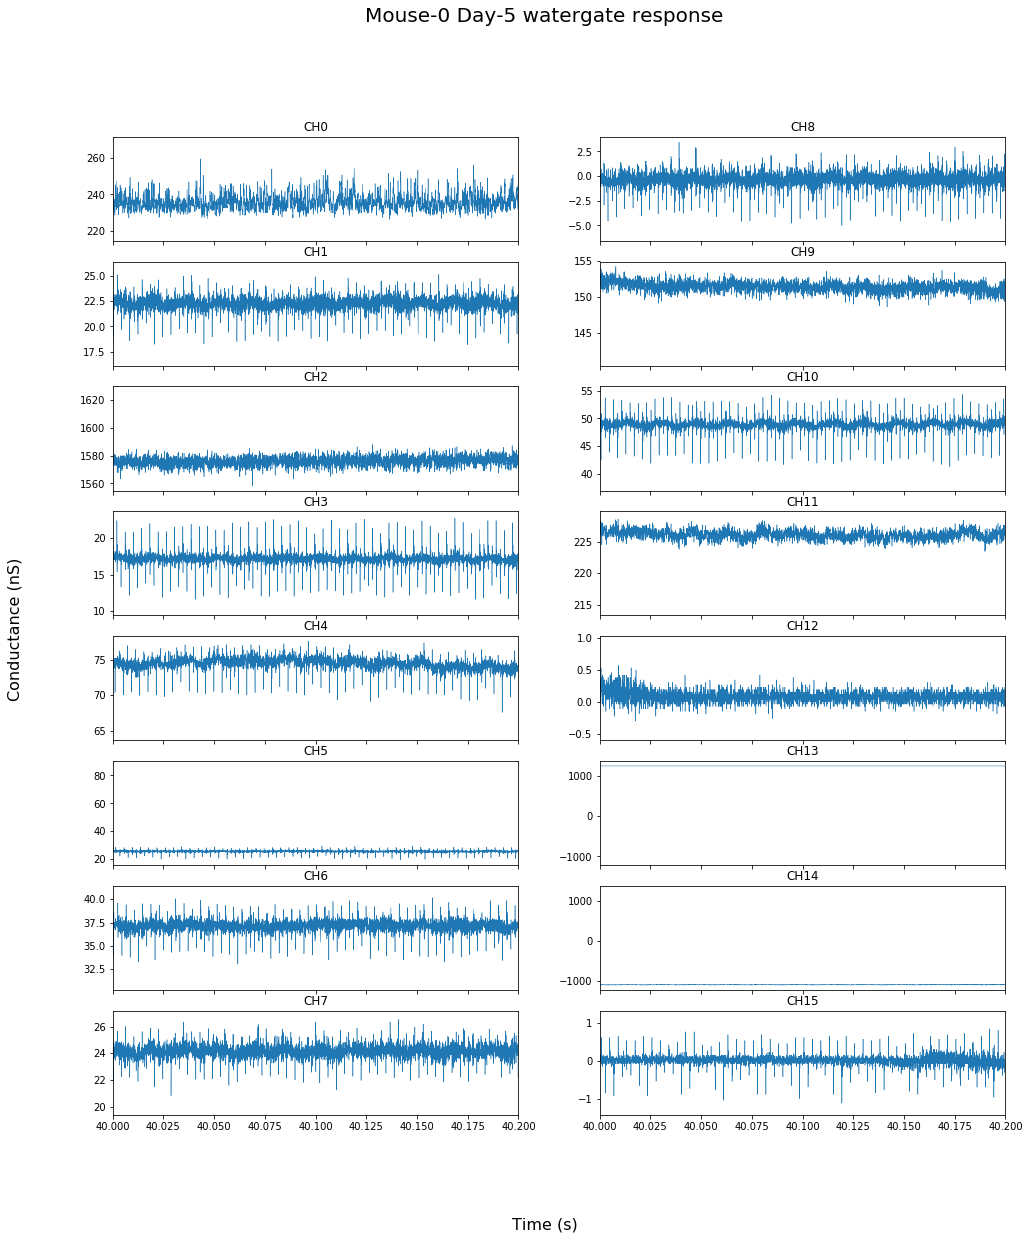

In [7]:
fig, ax = plt.subplots(8, 2, sharex='col', figsize=(16, 18));
fig.set_facecolor('white');
fig.suptitle("Mouse-0 Day-5 watergate response", fontsize=20);
fig.text(0.5, 0.04, 'Time (s)', va='center', ha='center', fontsize=16);
fig.text(0.04, 0.5, 'Conductance (nS)', va='center', ha='center', rotation='vertical', fontsize=16);

for i in range(8):
    ax[i, 0].plot(wg1.dataX[40*fs:50*fs], wg1_data[40*fs:50*fs, i], lw=0.5);
    
    ax[i, 0].set_title('CH'+str(i));
    ax[i, 0].set_xlim(40, 40.2);
    
    ax[i, 1].plot(wg2.dataX[40*fs:50*fs], wg2_data[40*fs:50*fs, i], lw=0.5);
    
    ax[i, 1].set_title('CH'+str(8+i));
    ax[i, 1].set_xlim(40, 40.2);

In [8]:
high1 = np.mean(wg1_data[40*fs:50*fs, :], axis=0);
high2 = np.mean(wg2_data[40*fs:50*fs, :], axis=0);
low1 = np.mean(wg1_data[10*fs:20*fs, :], axis=0);
low2 = np.mean(wg2_data[10*fs:20*fs, :], axis=0);

trans1 = (high1-low1)/100
trans2 = (high2-low2)/100

In [9]:
trans1

array([0.70973532, 0.19226762, 3.33404587, 0.16823234, 0.63330342,
       0.17312109, 0.33042948, 0.23366385])

In [10]:
trans2

array([  0.00025027,   1.31223116,   0.42703945,   1.64426093,
        -0.00002909, -10.79644645,  11.37385174,   0.00001497])

In [11]:
s1 = pyabf.ABF(data_names[1]);
s2 = pyabf.ABF(data_names[3]);

In [12]:
lowcut = 250
highcut = 3000

In [13]:
s1.setSweep(0)
s2.setSweep(0)

data1 = np.reshape(s1.signalData, (int(s1.signalData.shape[0]/8), 8));
data2 = np.reshape(s2.signalData, (int(s2.signalData.shape[0]/8), 8));

data1 = data1 * factor1[None, :]
data2 = data2 * factor2[None, :]

data1_bp = Butter_bandpass_filter(data1, lowcut, highcut, fs, order=2);
data2_bp = Butter_bandpass_filter(data2, lowcut, highcut, fs, order=2);

data1_theta = Butter_bandpass_filter(data1, 4, 10, fs, order=2);
data2_theta = Butter_bandpass_filter(data2, 4, 10, fs, order=2);

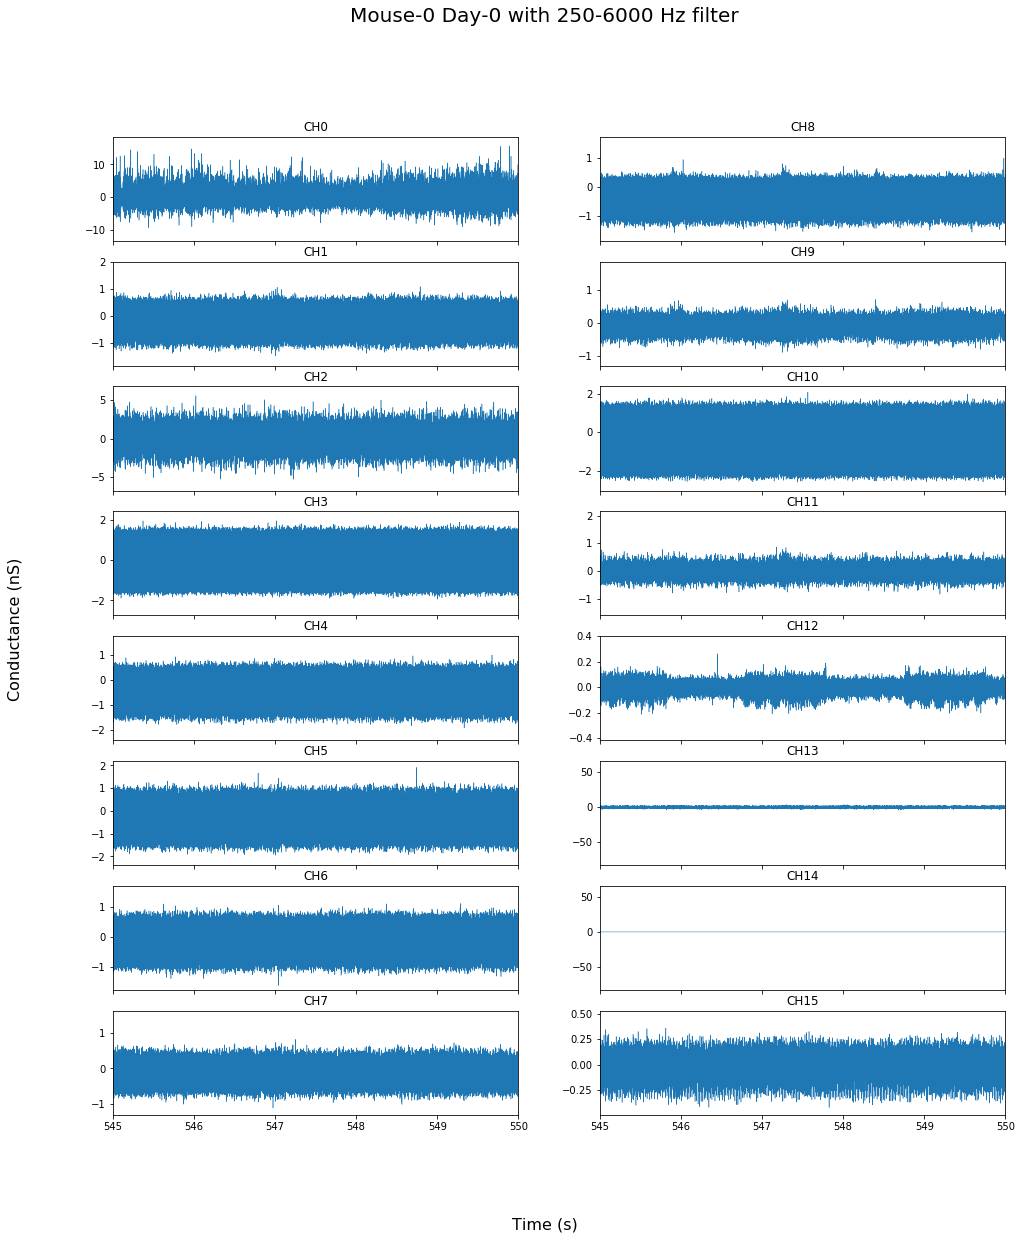

In [14]:
fig, ax = plt.subplots(8, 2, sharex='col', figsize=(16, 18));
fig.set_facecolor('white');
fig.suptitle("Mouse-0 Day-0 with 250-6000 Hz filter", fontsize=20);
fig.text(0.5, 0.04, 'Time (s)', va='center', ha='center', fontsize=16);
fig.text(0.04, 0.5, 'Conductance (nS)', va='center', ha='center', rotation='vertical', fontsize=16);

for i in range(8):
    ax[i, 0].plot(s1.dataX[10800000:12000000], data1_bp[10800000:12000000, i], lw=0.5);
    ax[i, 0].set_xlim(545.00, 550.00);
    ax[i, 0].set_title('CH'+str(i));
    
    ax[i, 1].plot(s2.dataX[10800000:12000000], data2_bp[10800000:12000000, i], lw=0.5);
    ax[i, 1].set_xlim(545.00, 550.00);
    ax[i, 1].set_title('CH'+str(8+i));


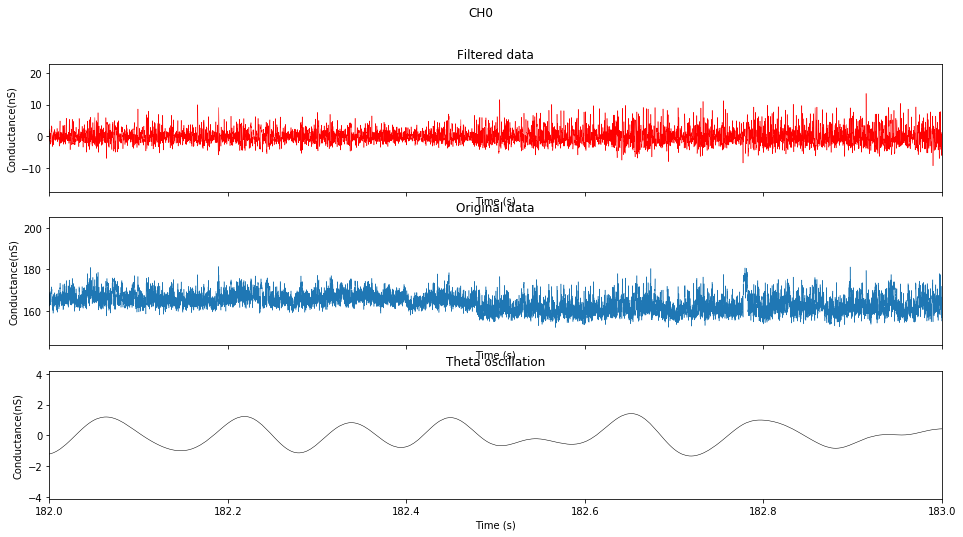

In [15]:
fig, ax = plt.subplots(3,1, sharex='col', figsize=(16, 8));
fig.set_facecolor('white');
fig.suptitle('CH0');
ax[0].plot(s1.dataX, data1_bp[:,0], color='r', lw=0.5);
ax[0].set_xlabel('Time (s)');
ax[0].set_ylabel('Conductance(nS)');
ax[0].set_title('Filtered data');
ax[0].set_xlim(182, 183);

ax[1].plot(s1.dataX, data1[:,0], lw=0.5);
ax[1].set_xlabel('Time (s)');
ax[1].set_ylabel('Conductance(nS)');
ax[1].set_title('Original data');

ax[2].plot(s1.dataX, data1_theta[:, 0], color = 'k', lw=0.5);
ax[2].set_xlabel('Time (s)');
ax[2].set_ylabel('Conductance(nS)');
ax[2].set_title('Theta oscillation');

# Spike detection and phase locking to Theta osillation

In [24]:
ch0 = data1_bp[:, 0];
ch0_raw = data1[:, 0];
ch0_theta = data1_theta[:, 0];

ch0_nor = Normalize(ch0);
ch0_rec = np.copy(ch0_nor);
ch0_rec[ch0_rec < 5] = 0
peak0 = Peaks(ch0_rec);

In [25]:
ch0_phase = Inst_phase(ch0_theta);
peak0_phase = ch0_phase[peak0];

In [26]:
ch0_phase.shape

(18206176,)

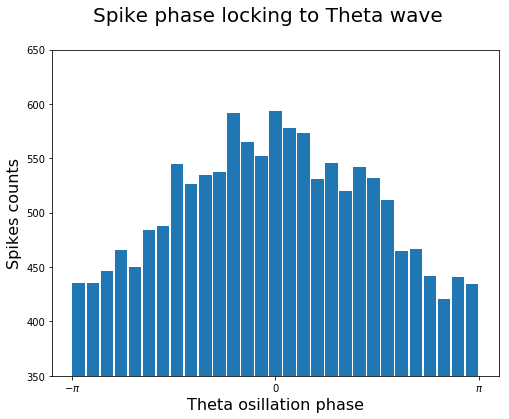

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6));
fig.set_facecolor('white');
fig.suptitle('Spike phase locking to Theta wave', fontsize=20);
ax.hist(peak0_phase, bins=29, rwidth=0.9);
ax.set_xticks((-np.pi, 0, np.pi));
ax.set_xticklabels((r'$-\pi$', '0', r'$\pi$'));
ax.set_xlabel('Theta osillation phase', fontsize=16);
ax.set_ylabel('Spikes counts', fontsize=16);
ax.set_ylim(350, 650);